In [1]:
import warnings
warnings.filterwarnings('ignore')
    
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data', header=None)


In [2]:
# Specify the name of the columns
df.columns = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']

# Show the header and the first five rows
df.head()

ID      Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
0   1  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1   2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2   3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3   4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4   5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   

    Oscore   Ascore ...   Ecstasy  Heroin  Ketamine Legalh  LSD Meth  \
0 -0.58331 -0.91699 ...       CL0     CL0       CL0    CL0  CL0  CL0   
1  1.43533  0.76096 ...       CL4     CL0       CL2    CL0  CL2  CL3   
2 -0.84732 -1.62090 ...       CL0     CL0       CL0    CL0  CL0  CL0   
3 -0.01928  0.59042 ...       CL0     CL0       CL2    CL0  CL0  CL0   
4 -0.45174 -0.30172 ...       CL1     CL0       CL0    CL1  CL0  CL0   

  Mushrooms Nicotine Semer  VSA  
0       CL0      CL2   CL0  CL0  
1       CL0      CL4   CL0  CL0  
2       CL1      CL0   CL0  CL0  
3       CL0      CL2   CL0  CL0  
4       CL2      CL2   CL0  CL0  

[5 rows x 32 columns]

In [3]:
# Specify the name of the columns that should be removed
columns_remove = ['ID', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Heroin', 'Crack', 'Ecstasy', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']

# Remove the columns above (in columns_remove)
df = df.drop(['ID',"Age","SS","Impulsive","Gender","Education","Ethnicity","Alcohol", 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Heroin', 'Coke', 'Ecstasy', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA',], axis=1)

In [4]:
df.head()

Country   Nscore   Escore   Oscore   Ascore   Cscore Crack
0  0.96082  0.31287 -0.57545 -0.58331 -0.91699 -0.00665   CL0
1  0.96082 -0.67825  1.93886  1.43533  0.76096 -0.14277   CL0
2  0.96082 -0.46725  0.80523 -0.84732 -1.62090 -1.01450   CL0
3  0.96082 -0.14882 -0.80615 -0.01928  0.59042  0.58489   CL0
4  0.96082  0.73545 -1.63340 -0.45174 -0.30172  1.30612   CL0

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000015EE6B77B38>],
      dtype=object)

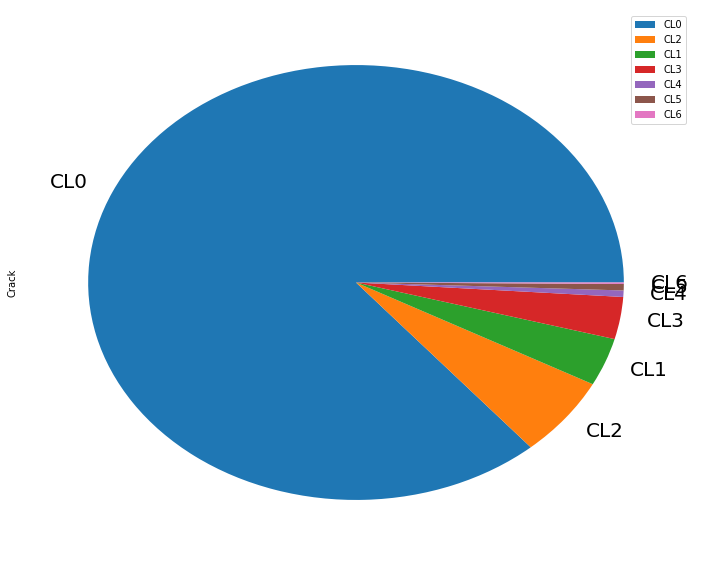

In [5]:
crack_dist = df.Crack.unique()
crack_Users = df['Crack'].value_counts()
crack_df = pd.DataFrame(crack_Users)

explode = (0, 0.05, 0, 0)
crack_df.plot.pie(subplots=True,fontsize=20,figsize=(12, 10))

In [6]:
crack_Users

CL0    1627
CL2     112
CL1      67
CL3      59
CL4       9
CL5       9
CL6       2
Name: Crack, dtype: int64

In [7]:
df.Crack.replace(to_replace=dict(CL0='NonUser', CL1= 'User', CL2= 'User', CL3= 'User', CL4 = 'User', CL5= 'User', CL6= 'User' ), inplace=True)



#Labels and the corresponding class of the target
#descriptions = ("Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", #"Used in Last Week", "Used in Last Day")
#class_label = ('CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6')
#=========================================================================================
#Alternatively 
#df.loc[df["Meth"]=="CL0","Meth"]= 0
#df.loc[df["Meth"]=="CL1","Meth"]= 0
#df.loc[df["Meth"]=="CL2","Meth"]= 0
#df.loc[df["Meth"]=="CL3","Meth"]= 1
#df.loc[df["Meth"]=="CL4","Meth"]= 1
#df.loc[df["Meth"]=="CL5","Meth"]= 1
#df.loc[df["Meth"]=="CL6","Meth"]= 1
df.head()

Country   Nscore   Escore   Oscore   Ascore   Cscore    Crack
0  0.96082  0.31287 -0.57545 -0.58331 -0.91699 -0.00665  NonUser
1  0.96082 -0.67825  1.93886  1.43533  0.76096 -0.14277  NonUser
2  0.96082 -0.46725  0.80523 -0.84732 -1.62090 -1.01450  NonUser
3  0.96082 -0.14882 -0.80615 -0.01928  0.59042  0.58489  NonUser
4  0.96082  0.73545 -1.63340 -0.45174 -0.30172  1.30612  NonUser

In [8]:
newc=df['Crack'].value_counts()
newc

NonUser    1627
User        258
Name: Crack, dtype: int64

In [9]:
import numpy as np

print('Number of rows before removing rows with missing values: ' + str(df.shape[0]))

# Replace ? with np.NaN
df.replace('?', np.NaN, inplace=True)

# Remove rows with np.NaN
df.dropna(how='any', inplace=True)

print('Number of rows after removing rows with missing values: ' + str(df.shape[0]))

Number of rows before removing rows with missing values: 1885
Number of rows after removing rows with missing values: 1885


In [10]:
# Get the feature vector
X = df.drop("Crack", axis=1).values

# Get the target vector
y = df["Crack"].values

In [11]:
# Specify the name of the target
target = 'Crack'

# Get the target vector
y = df[target]
# Specify the name of the features
features = list(df.drop(target, axis=1).columns)

# Get the feature vector
X = df[features]

In [12]:
#ONE HOT ENCODING 
X = pd.get_dummies(X)

# Show the encoded features
X.head(50)

Country   Nscore   Escore   Oscore   Ascore   Cscore
0   0.96082  0.31287 -0.57545 -0.58331 -0.91699 -0.00665
1   0.96082 -0.67825  1.93886  1.43533  0.76096 -0.14277
2   0.96082 -0.46725  0.80523 -0.84732 -1.62090 -1.01450
3   0.96082 -0.14882 -0.80615 -0.01928  0.59042  0.58489
4   0.96082  0.73545 -1.63340 -0.45174 -0.30172  1.30612
5   0.24923 -0.67825 -0.30033 -1.55521  2.03972  1.63088
6  -0.57009 -0.46725 -1.09207 -0.45174 -0.30172  0.93949
7   0.96082 -1.32828  1.93886 -0.84732 -0.30172  1.63088
8   0.24923  0.62967  2.57309 -0.97631  0.76096  1.13407
9   0.96082 -0.24649  0.00332 -1.42424  0.59042  0.12331
10  0.96082 -1.05308  0.80523 -1.11902 -0.76096  1.81175
11 -0.28519 -1.32828  0.00332  0.14143 -1.92595 -0.52745
12  0.96082  2.28554  0.16767  0.44585 -1.62090 -0.78155
13  0.24923 -0.79151  0.80523 -0.01928  0.94156  3.46436
14  0.96082 -0.92104  1.45421  0.44585 -0.60633  1.63088
15  0.96082 -2.05048 -1.50796 -1.55521 -1.07533  1.13407
16  0.96082 -1.55078 -0.80615 -1.68062  0.28783  0.75830
17  0.96082  0.52135 -1.23177 -0.31776 -0.45321 -1.38502
18 -0.09765  1.37297 -0.15487 -0.17779 -1.92595 -1.51840
19  0.96082 -0.34799 -1.76250 -2.39883 -1.92595  0.75830
20  0.96082 -0.79151  0.80523  0.72330  1.61108 -1.13788
21  0.96082 -1.19430  0.47617 -1.11902 -0.60633  1.81175
22  0.96082  0.41667 -0.94779 -0.84732  1.11406 -0.89891
23  0.96082  1.60383 -3.27393 -1.27553  0.28783 -1.01450
24  0.96082 -0.14882  0.63779  1.24033  0.76096  1.46191
25  0.96082 -0.79151 -0.43999 -1.27553  0.94156 -0.00665
26  0.24923 -0.05188 -1.63340 -3.27393 -0.76096  0.58489
27  0.96082  0.52135 -1.23177 -0.01928 -0.01729 -2.18109
28  0.96082  0.04257 -1.50796 -0.71727  0.28783  1.30612
29  0.96082 -1.32828  1.74091  0.88309  0.94156  1.81175
30  0.96082  0.31287 -0.80615 -1.27553 -1.47955 -0.65253
31 -0.28519 -1.19430 -0.80615  0.14143 -0.60633 -0.00665
32  0.96082 -0.79151 -1.23177 -0.01928  0.43852 -0.00665
33  0.96082  0.41667 -0.30033  0.29338  1.28610 -0.14277
34 -0.57009  1.02119  0.63779  0.88309 -2.90161 -0.78155
35  0.96082 -0.24649 -0.80615 -2.63199 -0.30172 -0.78155
36  0.96082 -0.24649 -0.57545 -0.17779 -0.01729 -1.51840
37 -0.57009  0.31287  0.32197  1.06238  0.13136 -0.65253
38  0.96082 -1.55078  1.28610  0.29338 -0.01729  0.75830
39  0.96082 -0.24649 -0.94779 -1.11902 -0.76096  0.41594
40  0.96082  0.04257 -0.43999 -0.01928 -2.07848  0.75830
41  0.96082  0.82562  0.00332  1.06238  1.81866 -0.40581
42  0.96082 -0.14882 -0.94779 -1.27553 -0.01729 -0.65253
43  0.96082 -0.92104 -0.57545 -0.31776 -0.15487 -1.01450
44  0.96082 -1.05308  1.45421  0.44585  1.28610  0.93949
45  0.96082 -0.46725  0.47617  1.24033  0.94156  1.63088
46  0.24923  0.31287  0.63779 -1.11902  0.28783  1.46191
47  0.96082 -2.05048  0.80523  0.29338  0.94156  1.13407
48  0.96082  0.13606 -0.80615 -0.31776 -0.15487 -0.65253
49  0.96082  0.82562 -0.57545 -1.97495 -0.91699  0.25953

In [13]:
from sklearn.preprocessing import LabelEncoder

# Declare the LabelEncoder
le = LabelEncoder()

print('The unique value in y before encoding: ' + (', ').join([str(val) for val in np.unique(y)]))

# Encode the target
# Implement me
y = le.fit_transform(y)
print('The unique value in y after encoding: ' + (', ').join([str(val) for val in np.unique(y)]))

The unique value in y before encoding: NonUser, User
The unique value in y after encoding: 0, 1


In [14]:
from sklearn.model_selection import train_test_split

# Randomly choose 30% of the data for testing (set random_state as 0 and stratify as y)
# Implement me
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [15]:
from sklearn.preprocessing import StandardScaler

# Declare the StandardScaler
std_scaler = StandardScaler()

# Standardize the features in the training data
X_train = std_scaler.fit_transform(X_train)

# Standardize the features in testing data
X_test = std_scaler.transform(X_test)

In [16]:
from sklearn.metrics import precision_recall_fscore_support

def train_test_evaluate(classifier):
    """
    Train, test, and evaluate the classifier
    :param classifier: a classifier             
    """
    
    # Declare the model
    clf = classifier(random_state=0)
    
    # Train the model
    clf.fit(X_train, y_train)
    
    if classifier is DecisionTreeClassifier:
        global tree  
        # Get the tree
        tree = clf
    elif classifier is RandomForestClassifier:
        global importances
        # Get the feature importances
        importances = clf.feature_importances_
    
    # Update the list of accuracies
    accuracies.append(clf.score(X_test, y_test))

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# The list of classifiers
clfs = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier]

# The tree
tree = None

# The list of importances
importances = []

# The list of accuracies
accuracies = []

# For each classifer
for classifier in clfs:
    # Call function train_test_evaluate (defined above)
    train_test_evaluate(classifier)
    
print(importances)

print(accuracies)

[0.09398231 0.20025521 0.19474485 0.15676043 0.17392934 0.18032785]
[0.8639575971731449, 0.7526501766784452, 0.842756183745583]


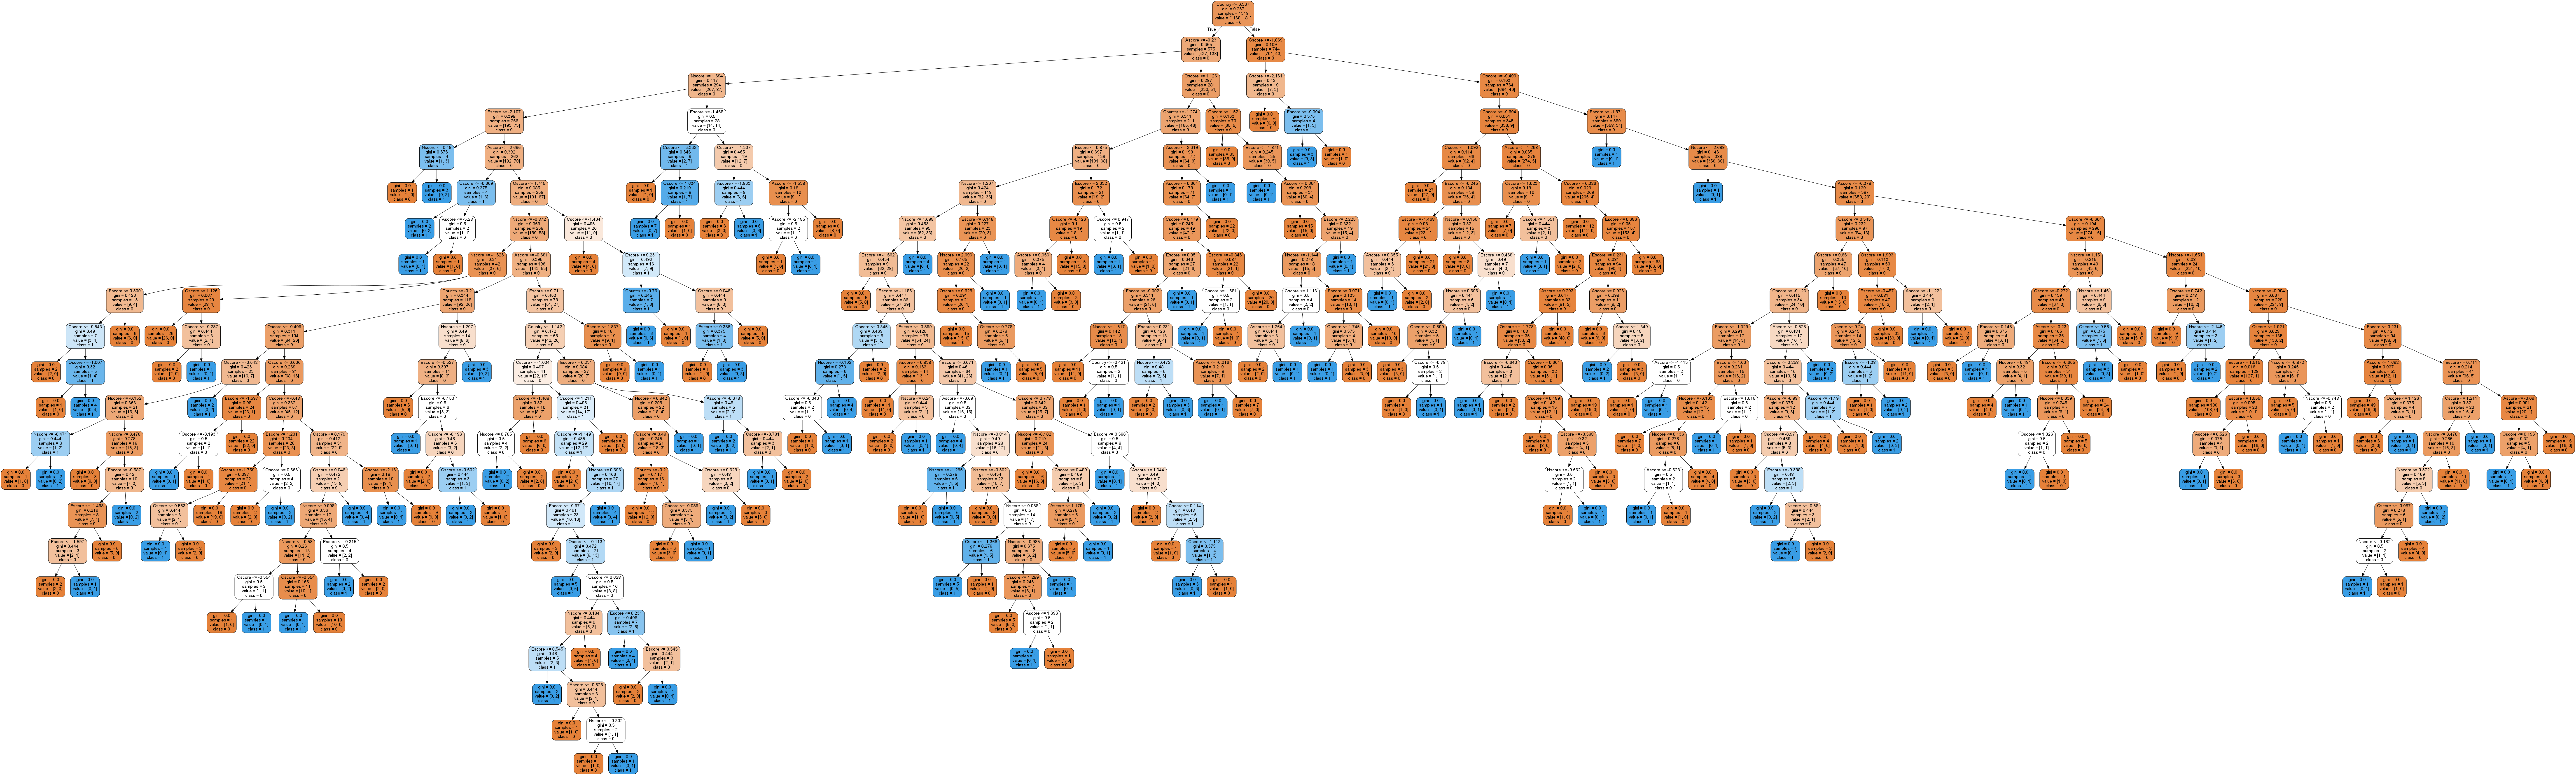

In [18]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=['0', 
                                        '1',
                                       "2",
                                       #"3",
                                       #"4",
                                       #"5",
                                       #"6"
                                       ],
                           feature_names=X.columns,
                           out_file=None) 

graph = graph_from_dot_data(dot_data) 

img = Image(graph.create_png()) 
img

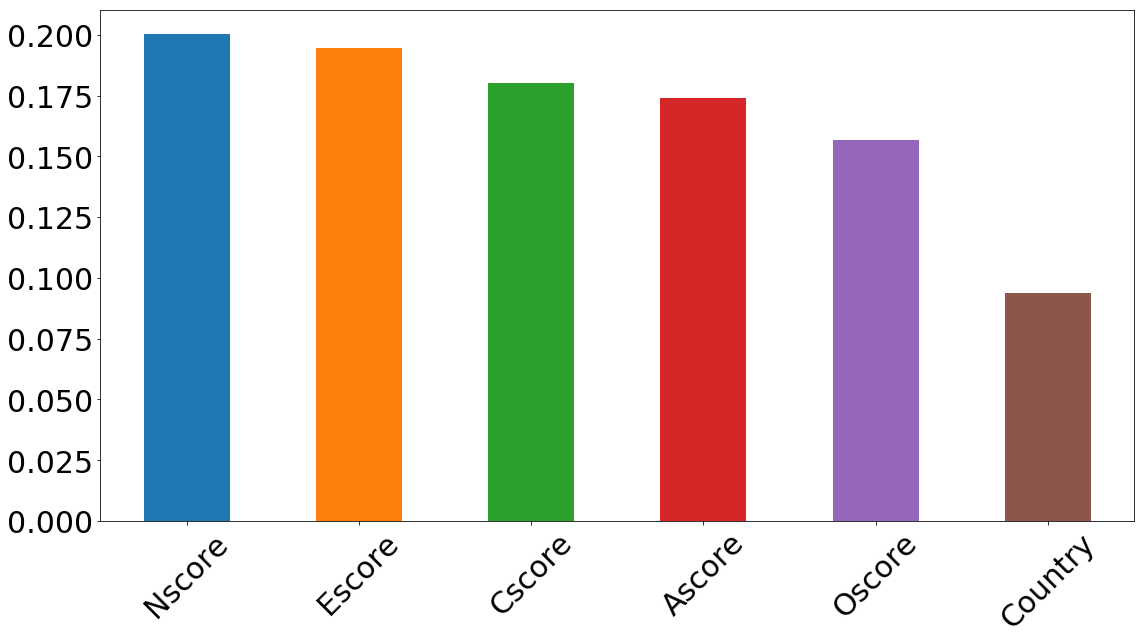

In [19]:
# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X.columns)

# Sort the array in descending order of the importances
f_importances = f_importances.sort_values(ascending=False)

# Draw the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=30)

# Show the plot
plt.tight_layout()
plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Delcare the model
rf = RandomForestClassifier(random_state=0, class_weight='balanced')

# Train the model
# Implement me
rf.fit(X_train, y_train)


# Print the classification accuracy
print('The accuracy of random forest is: ' + str(rf.score(X_test, y_test)))

The accuracy of random forest is: 0.8515901060070671


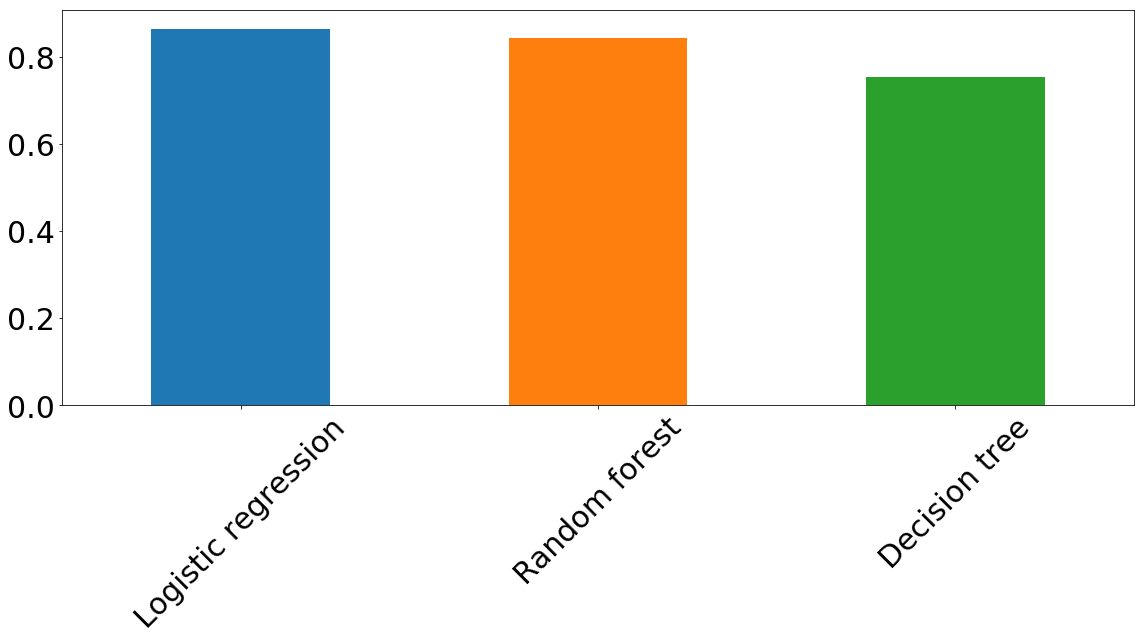

In [21]:
# Convert the accuracies into one-dimensional 1darray with corresponding classifier names as axis labels
clf_accuracies = pd.Series(accuracies, ['Logistic regression', 'Decision tree', 'Random forest'])

# Sort the array in descending order of the accuracies
clf_accuracies = clf_accuracies.sort_values(ascending=False)

# Draw the bar Plot from clf_accuracies 
clf_accuracies.plot(x='Classifiers', y='Fscores', kind='bar', figsize=(16,9), rot=45, fontsize=30)

# Show the plot
plt.tight_layout()
plt.show()

In [22]:
from sklearn.linear_model import LogisticRegression

# Delcare the model
lr = LogisticRegression(random_state=0, class_weight='balanced')

# Train the model
# Implement me 
lr.fit(X_train, y_train)

# Print the classification accuracy
print('The accuracy of logistic regression is: ' + str(lr.score(X_test, y_test)))

The accuracy of logistic regression is: 0.6219081272084805


In [23]:
def get_distribution(clf, X, y, feature, class_):
    """
    Calculate the probability distribution of a class based on a feature
    :param clf: the logistic regression classifier
    :param X: the feature vector
    :param y: the target vector
    :param feature: a feature
    :param class_: a class label of the target
    :return: the probability distribution, which is a dictionary 
             where the key is the value of the feature and value the probability:
             distribution = {val_1: proba_1, val_2: proba_2, ..., val_n: proba_n}
             
    """
    
    # Get the column number of the feature
    col = features.index(feature)
    
    # Get the encoded number of the class_
    num = le.transform([class_])
    
    # Get X_sparse
    # Here, all the columns are zeros except for column col, where X_sparse[:, col] = X[:, col]
    X_sparse = np.zeros((X.shape[0], X.shape[1]))
    X_sparse[:, col] = X[:, col]
    
    # Get the unique value and the corresponding index in column col
    vals, idxs = np.unique(X_sparse[:, col], return_index=True)
    
    # Get the distribution
    distribution = {}
    # For each unique index
    for idx in idxs:
        # Get the corresponding value
        val = X_sparse[idx, col]
        
        # Get the probability of each class
        probas = clf.predict_proba(X_sparse[idx, :].reshape(1, -1)).ravel()

        # Get the probability of the class
        proba = probas[num]
        
        distribution[val] = proba
        
    return distribution

def plot_distribution(distribution, feature, class_):
    """
    Plot the probability distribution of a class based on the feature
    :param distribution: the probability distribution, which is a dictionary 
                         where the key is the value of the feature and value the probability:
                         distribution = {val_1: proba_1, val_2: proba_2, ..., val_n: proba_n}
    :param feature: a feature
    :param class_: a class label of the target
    """
    
    # Get the probabilities
    probas = [distribution[val] for val in sorted(distribution.keys())]
    
    # Get the dataframe
    probas_df = pd.DataFrame(probas)
    
    # Get the values
    vals = sorted(distribution.keys())
    
    # Round down to 2 decimals
    vals = [round(val, 2) for val in vals]

    # Plot the bar chart
    probas_df.plot(kind='bar', figsize=(25, 10), fontsize=30, color='purple', legend=False)
    plt.xticks(range(len(vals)), vals)
    plt.xlabel('Feature value', fontsize=30)
    plt.ylabel('Probability', fontsize=30)
    plt.title('P(' + class_ + ' | ' + feature + ')', fontsize=30, loc='center')
    plt.tight_layout()
    plt.show()

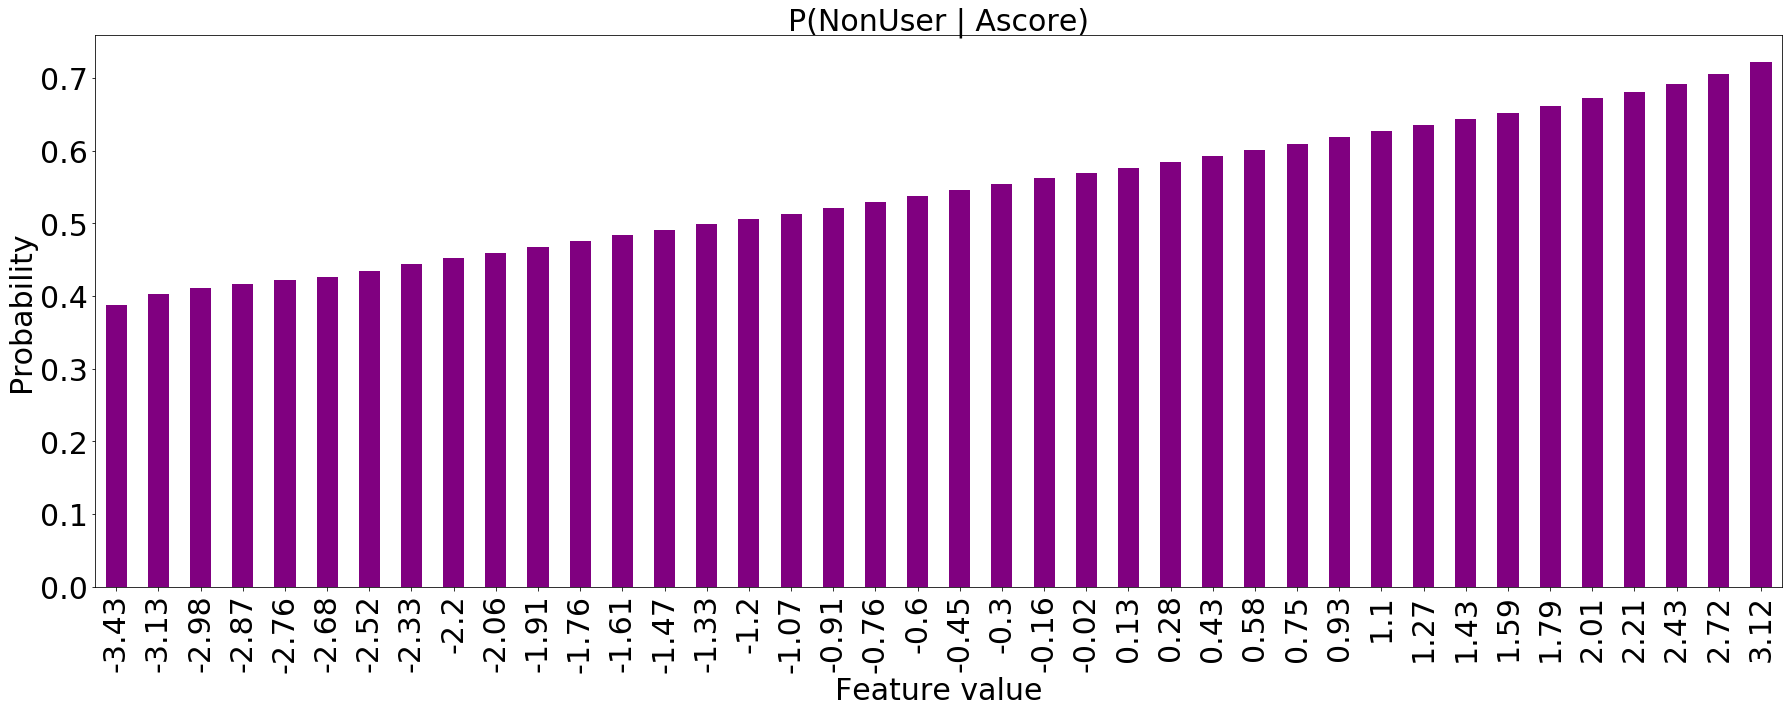

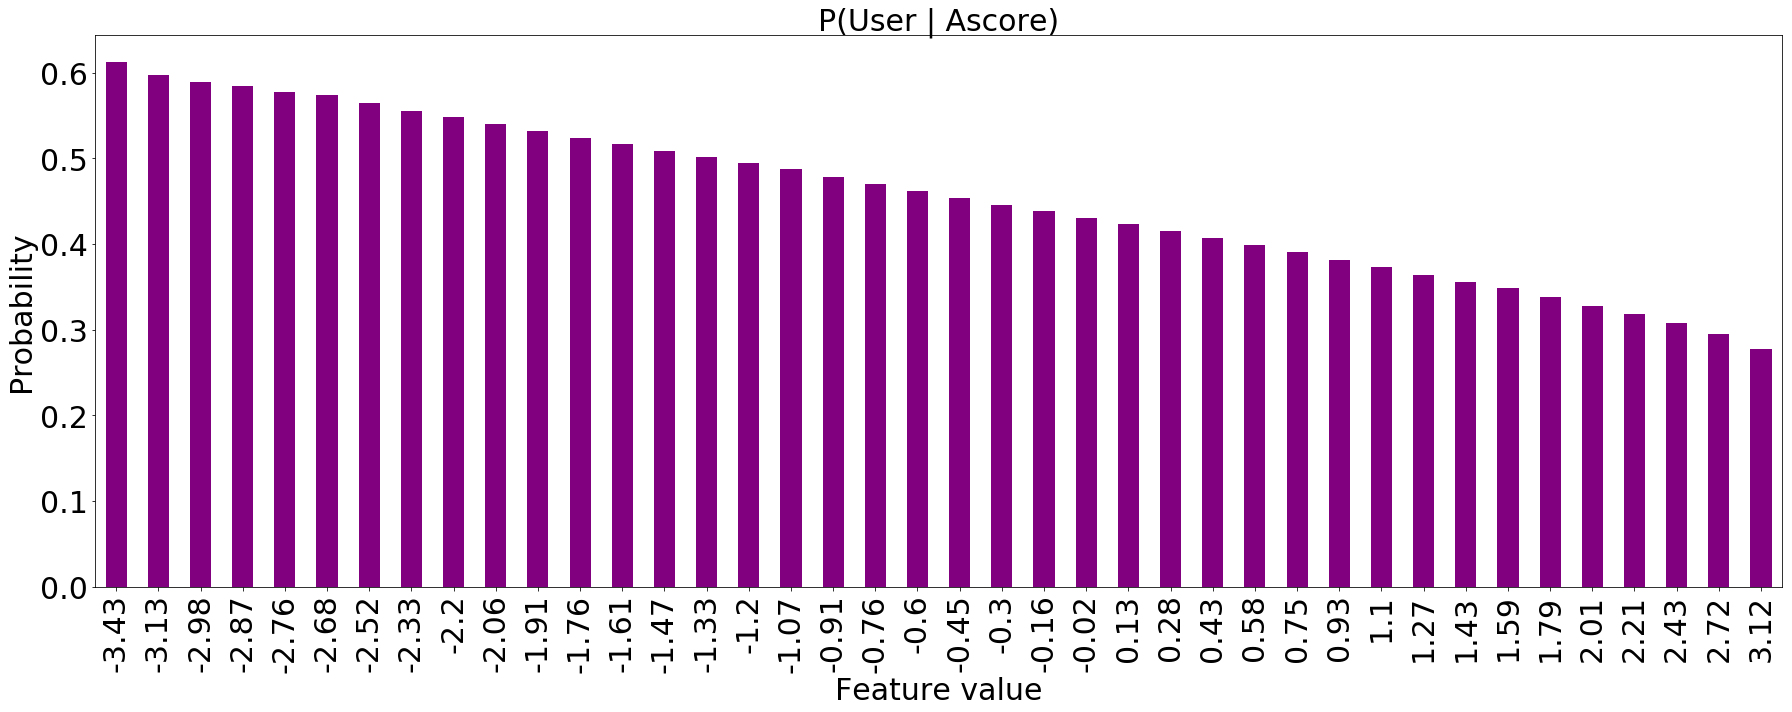

In [24]:
# Get the distribution of the Agreeableness vs the class Never Used
distribution = get_distribution(lr, X_train, y_train, 'Ascore', 'NonUser')

# Plot the distribution
plot_distribution(distribution, 'Ascore', 'NonUser') 

# Get the distribution of the Agreeableness vs the class Never Used
distribution = get_distribution(lr, X_train, y_train, 'Ascore', 'User')

# Plot the distribution
plot_distribution(distribution, 'Ascore', 'User')



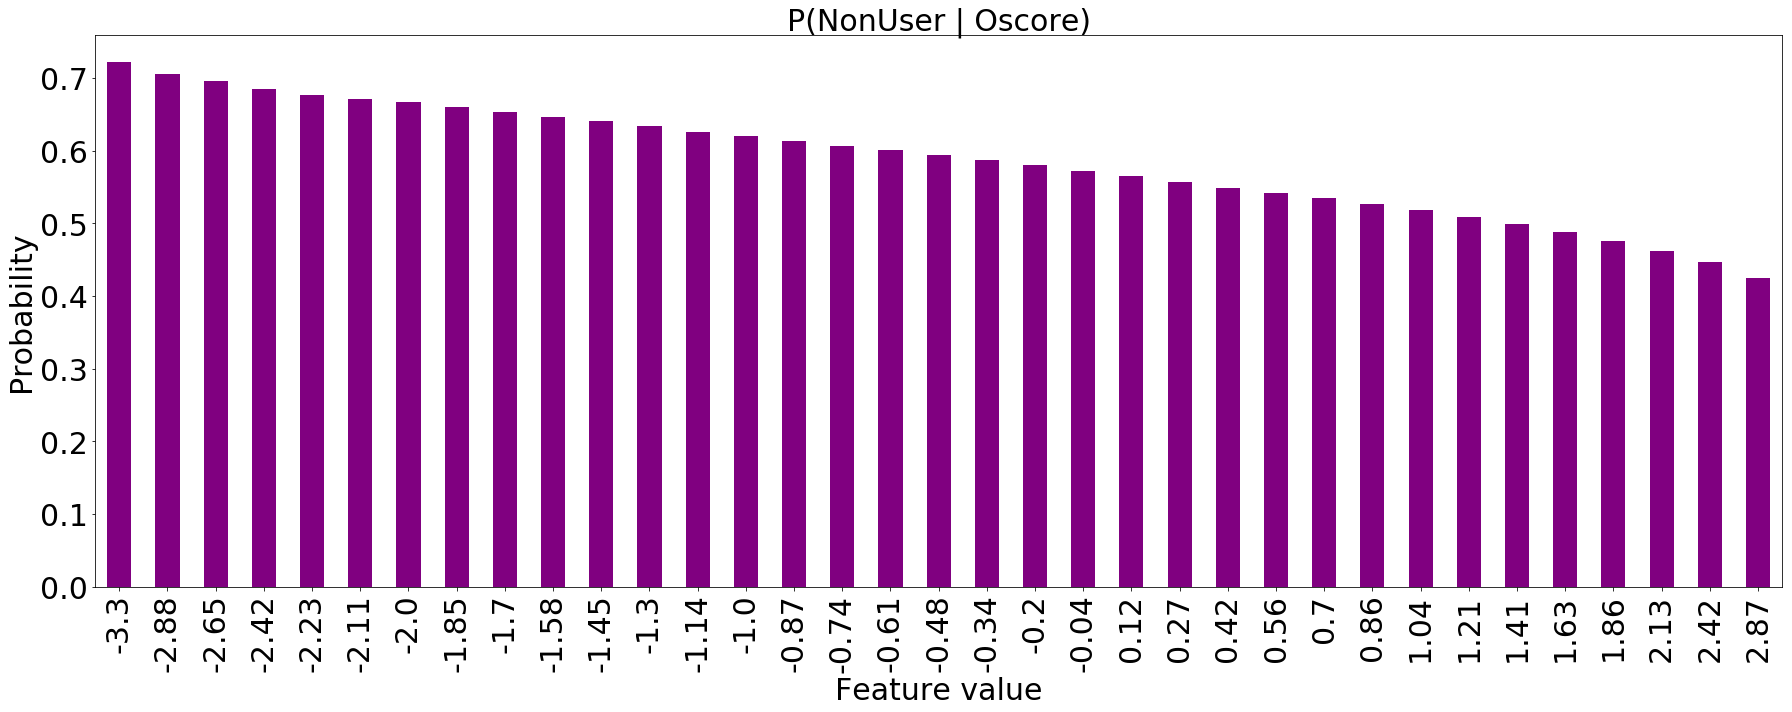

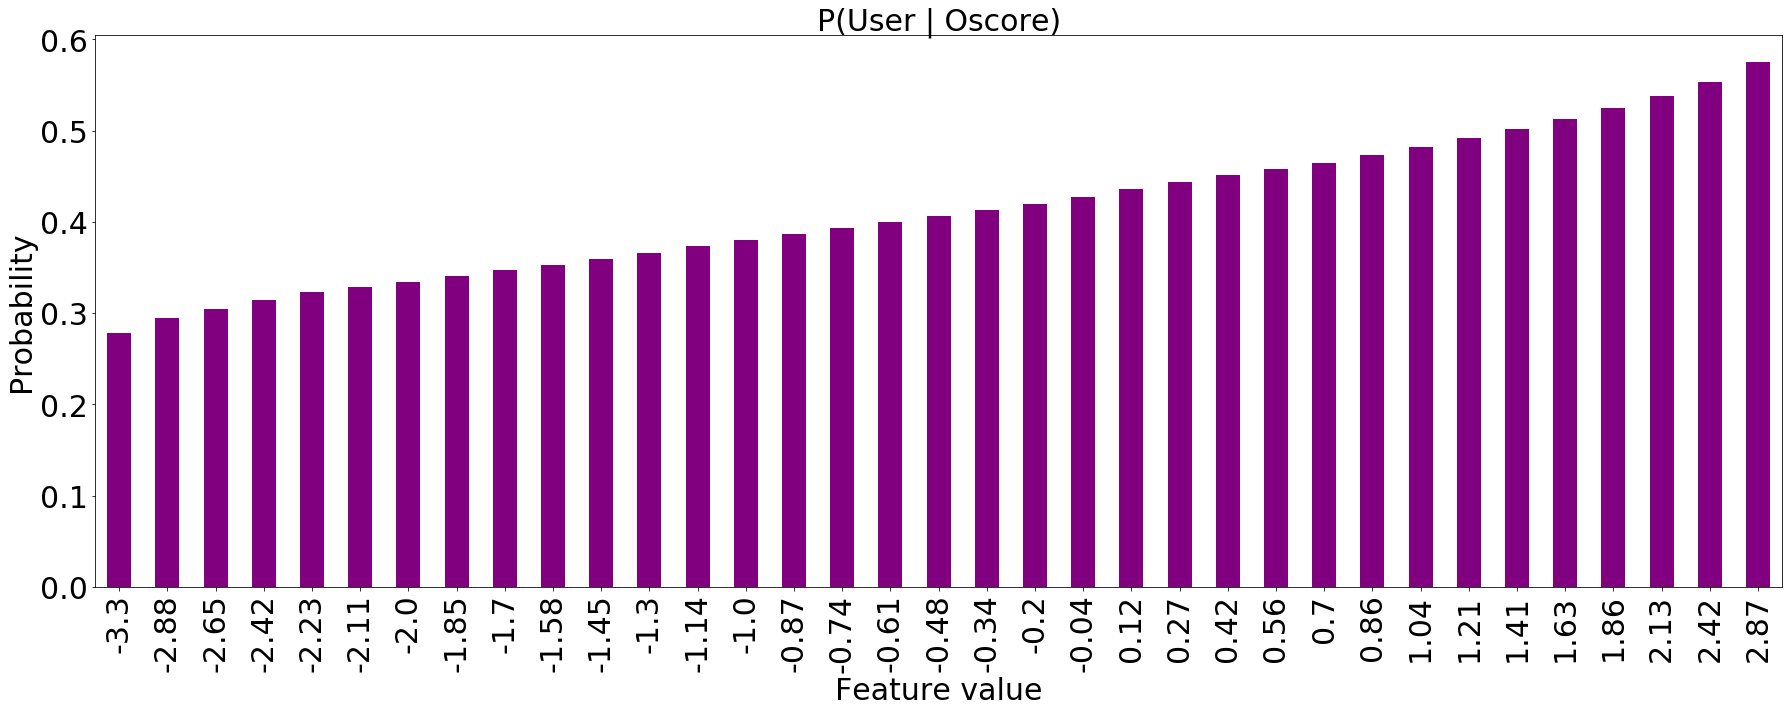

In [25]:
# Get the distribution
distribution = get_distribution(lr, X_train, y_train, 'Oscore', 'NonUser')

# Plot the distribution
plot_distribution(distribution, 'Oscore', 'NonUser')

# Get the distribution of the Agreeableness vs the class Never Used
distribution = get_distribution(lr, X_train, y_train, 'Oscore', 'User')

# Plot the distribution
plot_distribution(distribution, 'Oscore', 'User')

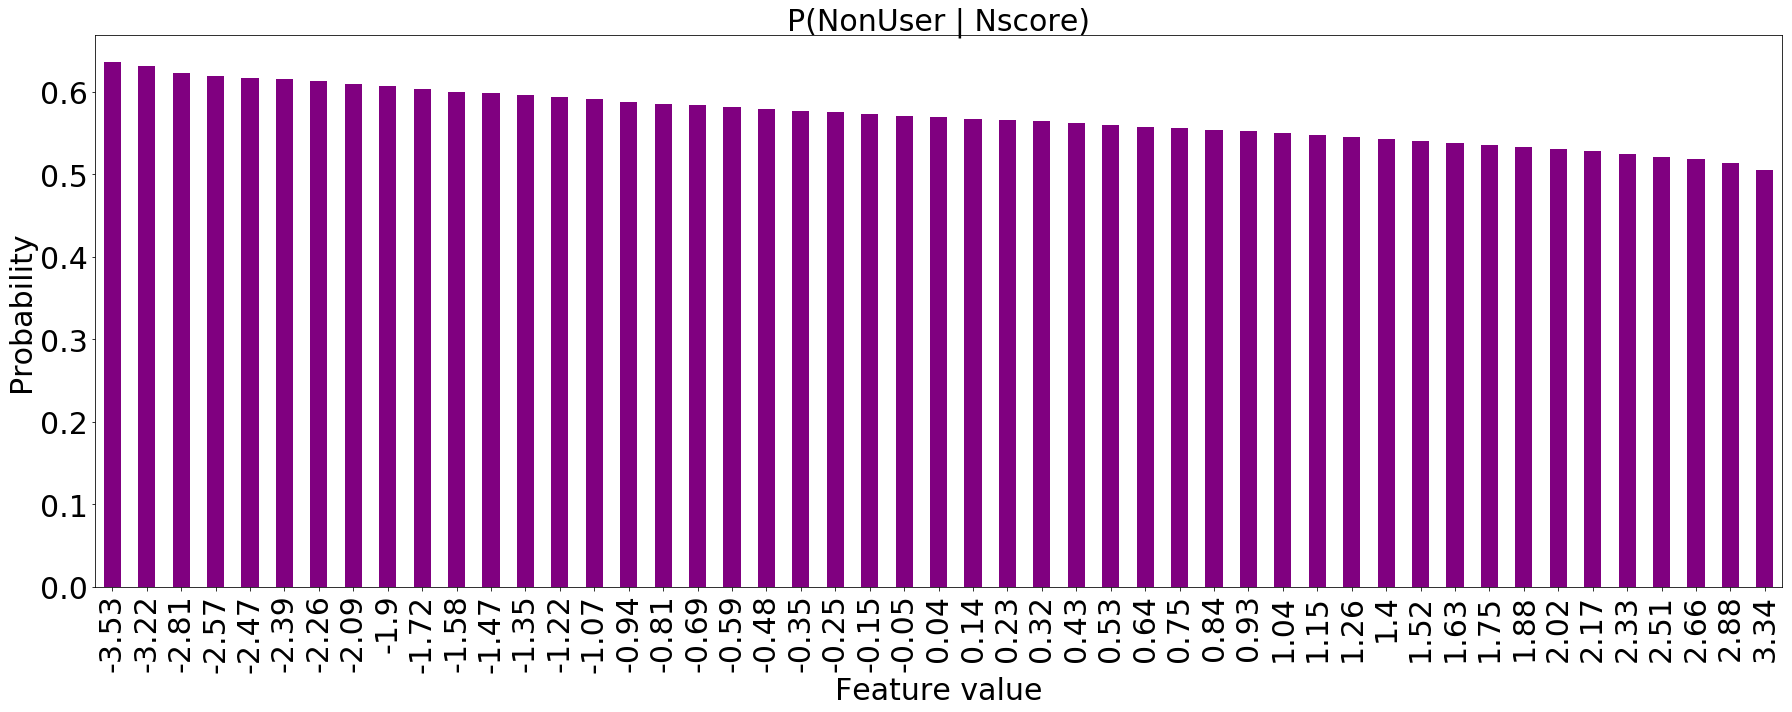

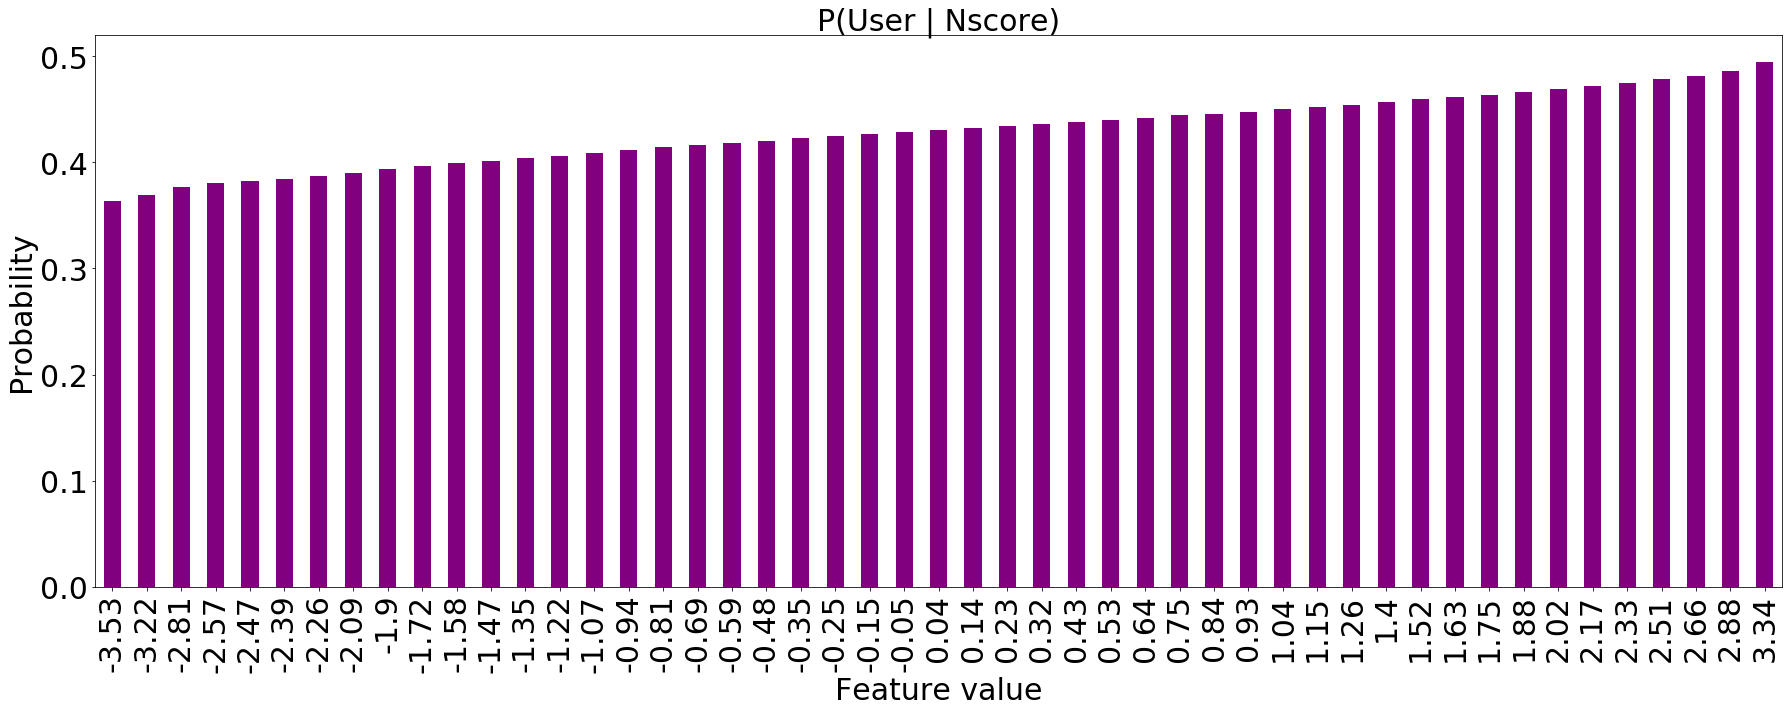

In [26]:
# Get the distribution
distribution = get_distribution(lr, X_train, y_train, 'Nscore', 'NonUser')

# Plot the distribution
plot_distribution(distribution, 'Nscore', 'NonUser')

# Get the distribution of the Agreeableness vs the class Never Used
distribution = get_distribution(lr, X_train, y_train, 'Nscore', 'User')

# Plot the distribution
plot_distribution(distribution, 'Nscore', 'User')

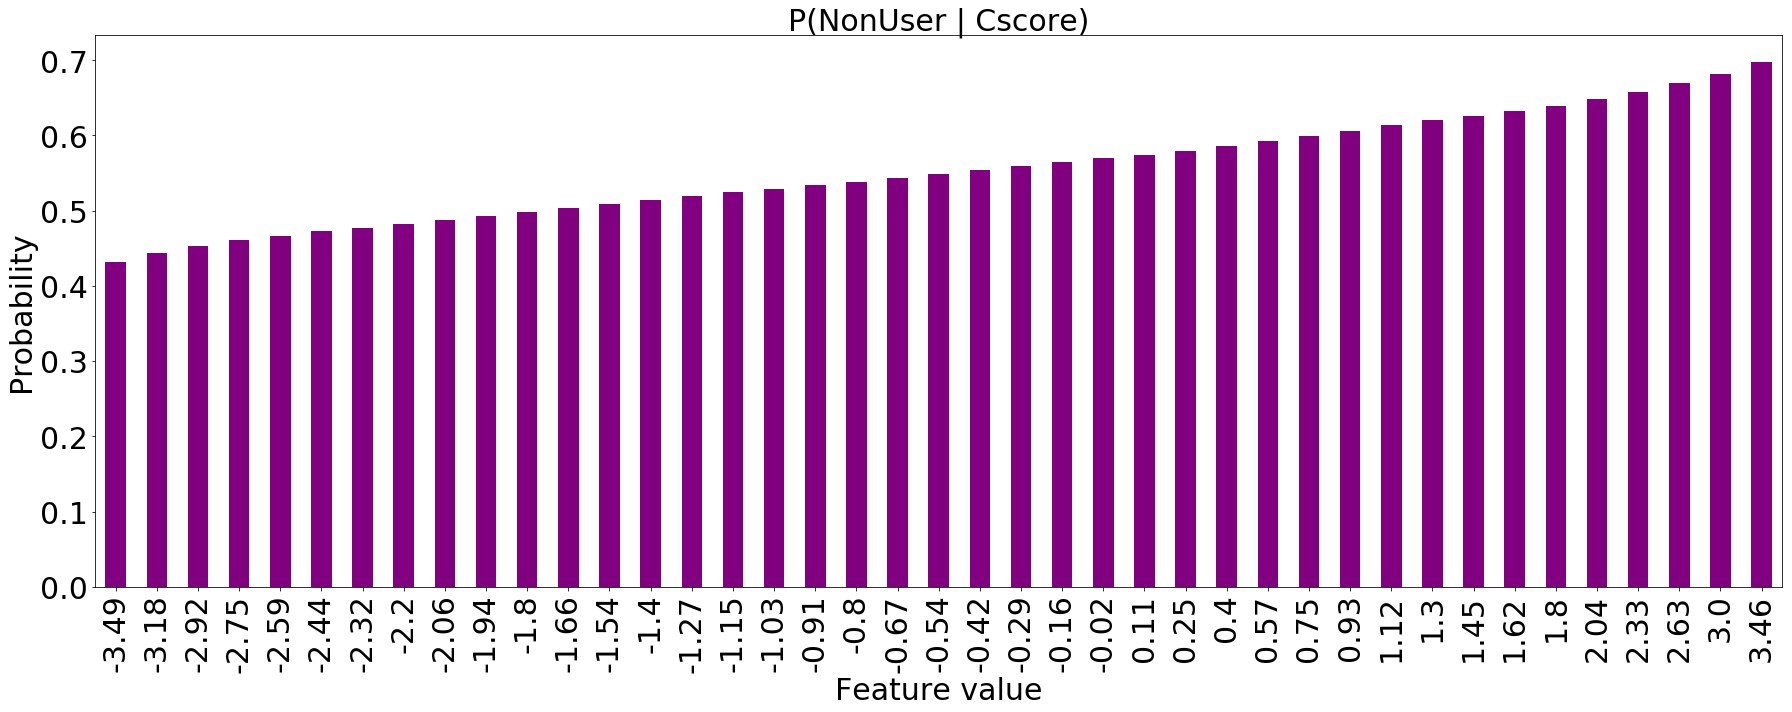

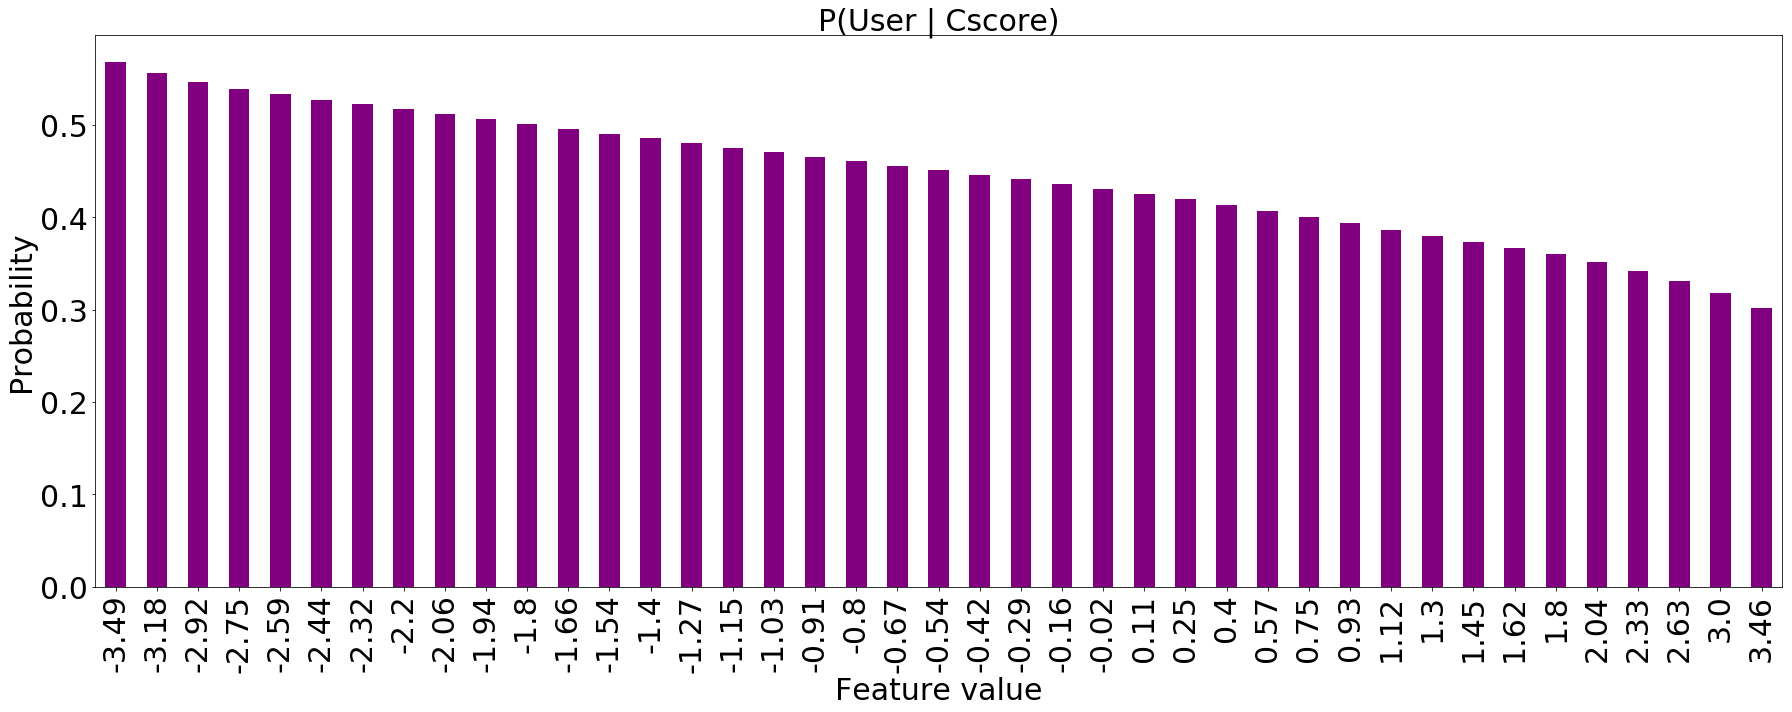

In [27]:
# Get the distribution
distribution = get_distribution(lr, X_train, y_train, 'Cscore', 'NonUser')

# Plot the distribution
plot_distribution(distribution, 'Cscore', 'NonUser')

# Get the distribution
distribution = get_distribution(lr, X_train, y_train, 'Cscore', 'User')

# Plot the distribution
plot_distribution(distribution, 'Cscore', 'User')

In [28]:
from sklearn import cross_validation
modelRandom = LogisticRegression(random_state=0, class_weight='balanced')
modelRandomCV= cross_validation.cross_val_score(modelRandom,X,y,cv=5)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [29]:
modelRandomCV
rf_df = pd.DataFrame(modelRandomCV)

In [30]:
modelRandomCV.mean()

0.6411116545746041

In [31]:

df['Country'] = df['Country'].astype(str)


df['Country'] = df['Country'].replace(
    {'0.9608200000000001': 'UK',
     '0.24923': 'Canada',
     "-0.57009":"USA",
     "-0.28519": "Other",
     "-0.09765": "Australia",
     "0.21128": "Ireland",
    "-0.46841": "New Zealand"})


In [32]:
modelRandom.fit(X,y)
Test_df = pd.DataFrame(X_test)
Test_df.columns = ['Country', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore',]
Test_df['CrackActual'] = pd.DataFrame(y_test)
Test_df['CrackPredicted']=pd.DataFrame(modelRandom.predict(X_test))

Test_df.head(50)

Country    Nscore    Escore    Oscore    Ascore    Cscore  CrackActual  \
0   0.846950  0.749843 -0.171576  1.214682 -0.452707  0.747940            0   
1  -0.938327 -0.052361  0.308662  0.558243  0.579712 -0.913842            0   
2  -0.226987 -1.072474  0.463961  0.857758  0.429443  0.747940            0   
3   0.846950 -1.072474  1.106397  0.420905  0.748419  1.124747            0   
4   0.846950 -0.250647  1.279663  0.116754  0.579712  1.124747            0   
5   0.846950  0.319280 -0.458728 -0.741186  0.927079 -0.155616            0   
6   0.846950  0.228660  1.279663 -0.475891 -1.468021 -0.796159            0   
7   0.846950  0.319280  0.626733  0.698110  1.589407  0.247794            0   
8  -1.346530 -0.250647 -0.012259 -0.342029  0.748419 -0.796159            0   
9  -1.346530 -1.072474  0.953736  0.420905 -0.021470  0.574052            0   
10 -0.938327 -0.475577 -1.534309  0.268570  0.125583 -1.657990            1   
11 -1.346530  0.043874  0.795366  0.857758 -0.452707  1.297272            0   
12  0.846950 -0.590620  1.279663  1.409510 -1.332829 -0.019120            1   
13  0.846950  0.319280  0.626733 -1.578384  0.280372  0.929630            0   
14  0.846950  0.228660 -0.715646 -0.342029 -0.302844 -0.541358            0   
15 -1.346530 -0.052361  1.279663  1.409510  0.748419  2.038251            0   
16  0.846950 -1.352873  1.937075 -0.871121 -0.302844  1.622928            0   
17 -1.346530 -0.354064 -0.595153  0.857758  0.748419 -1.799058            0   
18 -1.346530 -0.250647  0.308662  0.857758  0.429443  0.111198            0   
19  0.846950  0.642065 -0.595153 -0.342029 -0.452707 -1.153472            0   
20 -1.346530  0.319280  1.279663 -0.202183 -0.757151 -1.029751            0   
21  0.846950  0.642065  1.448971 -0.202183  2.431799 -0.541358            0   
22  0.846950 -1.465756  0.795366 -0.043813  2.431799 -0.289284            0   
23  0.846950  0.425041 -0.318073  0.268570  1.267918 -0.155616            0   
24  0.846950 -0.475577 -1.534309 -0.741186 -0.604182 -0.666783            0   
25 -1.346530 -0.250647  0.626733 -1.447530  0.125583  0.747940            0   
26 -1.346530  1.154710 -0.595153 -0.342029 -0.604182  1.124747            0   
27  0.846950  1.258433 -0.458728 -1.298952 -0.911505  0.747940            0   
28 -1.346530 -1.579577  1.279663 -0.999997  0.429443  0.929630            0   
29 -1.346530  0.425041 -1.951028 -0.999997  0.748419 -1.535042            0   
30  0.846950 -1.072474  1.448971  0.420905  1.267918  0.929630            0   
31 -1.346530  1.875157 -0.970147  0.116754 -1.468021 -1.273653            1   
32  0.846950  1.520257 -0.012259 -1.298952 -0.911505  1.124747            0   
33  0.846950  0.749843 -0.171576 -1.142580  0.125583 -0.155616            0   
34 -1.346530  1.040981  0.795366  1.036890 -1.068144 -0.541358            0   
35  0.846950 -0.590620  0.953736 -0.607344  0.748419 -0.289284            0   
36 -1.346530 -0.475577  1.106397  0.558243 -0.604182 -1.153472            0   
37 -1.346530  2.022357 -0.970147  0.698110 -0.604182 -1.029751            0   
38  0.846950 -0.354064 -1.256151 -1.997753  0.280372 -0.289284            0   
39  0.846950 -0.937940  0.626733 -0.202183 -1.332829  0.247794            0   
40  0.846950 -0.151132 -0.970147 -1.298952 -0.021470 -0.666783            0   
41 -1.346530 -2.088717 -0.970147  0.116754 -0.021470 -0.666783            0   
42 -0.938327 -1.072474  0.795366  1.630514 -1.203474 -2.322890            0   
43 -1.346530 -0.354064  0.153262 -0.043813 -0.157572 -1.029751            0   
44  0.846950 -1.216362  0.626733 -1.142580 -0.452707 -0.019120            0   
45 -1.346530  0.642065 -1.660643 -1.298952 -0.021470 -0.913842            0   
46  0.846950  0.425041 -0.595153 -0.999997 -0.157572  1.453492            0   
47  0.846950 -0.151132  0.626733  1.214682  0.748419  1.453492            0   
48 -1.346530  0.228660 -0.012259 -0.043813 -0.452707  0.929630            0   
49 -1.346530  0.841716 -0.715646 -0.043813 -0.302844  0

In [33]:
#modelRandom.fit(X,y)
#prediction = modelRandom.predict(X_test)
#prediction_df = pd.DataFrame({"Prediction": prediction, "Actual": y_test})
#prediction_df

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000015EEC2E6EF0>],
      dtype=object)

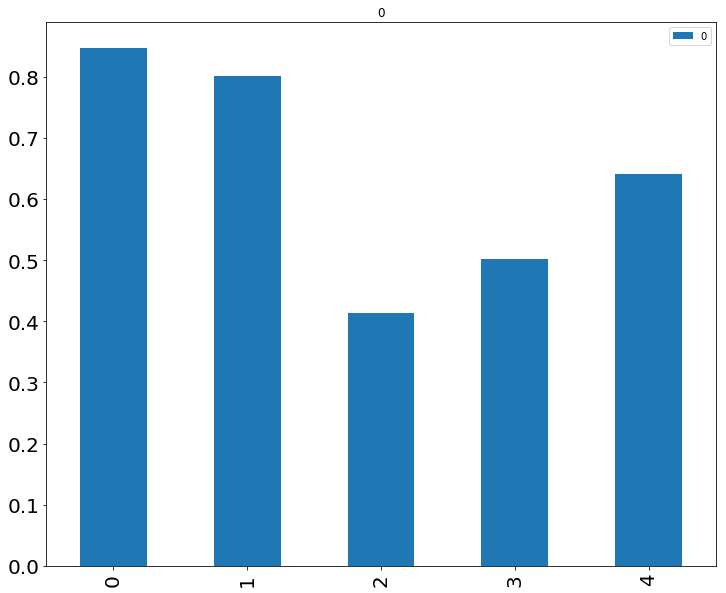

In [34]:
rf_df.plot.bar(subplots=True,fontsize=20,figsize=(12, 10))